In [20]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
file_path = r"D:\Git Repositories\AuctionScout-AI-powered-player-recommendations-for-IPL-auctions\dataset\bowlers_df.csv"
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_Name          197 non-null    object 
 1   Deliveries_bowled    197 non-null    int64  
 2   runs_conceded        197 non-null    int64  
 3   wickets_taken        197 non-null    int64  
 4   overs                197 non-null    int64  
 5   bowling_average      197 non-null    float64
 6   bowling_strike_rate  197 non-null    float64
 7   economy              197 non-null    float64
 8   Recommendation       20 non-null     object 
dtypes: float64(3), int64(4), object(2)
memory usage: 14.0+ KB


In [3]:
encoder = OneHotEncoder()

In [4]:
encoded_recommendations = encoder.fit_transform(df[['Recommendation']]).toarray()

In [5]:
enc_recommendations_df = pd.DataFrame(encoded_recommendations, columns=encoder.categories_[0])
enc_recommendations_df

,BUY,DON'T BUY,MAYBE,NaN
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
192,0.0,0.0,0.0,1.0
193,0.0,0.0,0.0,1.0
194,0.0,0.0,0.0,1.0
195,0.0,0.0,0.0,1.0


In [6]:
enc_recommendations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BUY        197 non-null    float64
 1   DON'T BUY  197 non-null    float64
 2   MAYBE      197 non-null    float64
 3   nan        197 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [7]:
new_df = pd.concat([df.drop(columns=['Recommendation']),enc_recommendations_df], axis=1)
new_df 

,Player_Name,Deliveries_bowled,runs_conceded,wickets_taken,overs,bowling_average,bowling_strike_rate,economy,BUY,DON'T BUY,MAYBE,NaN
0,A Zampa,1248,1566,63,208,24.86,19.81,7.53,1.0,0.0,0.0,0.0
1,AC Agar,961,1118,36,160,31.06,26.69,6.99,0.0,0.0,1.0,0.0
2,AD Russell,184,283,7,30,40.43,26.29,9.43,0.0,0.0,1.0,0.0
3,ADS Fletcher,6,9,0,1,48.44,39.12,9.00,0.0,1.0,0.0,0.0
4,AF Milne,342,435,8,57,54.38,42.75,7.63,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
192,XA Crone,30,51,0,5,48.44,39.12,10.20,0.0,0.0,0.0,1.0
193,XC Bartlett,997,1383,60,166,23.05,16.62,8.33,0.0,0.0,0.0,1.0
194,Z Evans,159,268,13,26,20.62,12.23,10.31,0.0,0.0,0.0,1.0
195,Zahir Khan,492,620,18,82,34.44,27.33,7.56,0.0,0.0,0.0,1.0


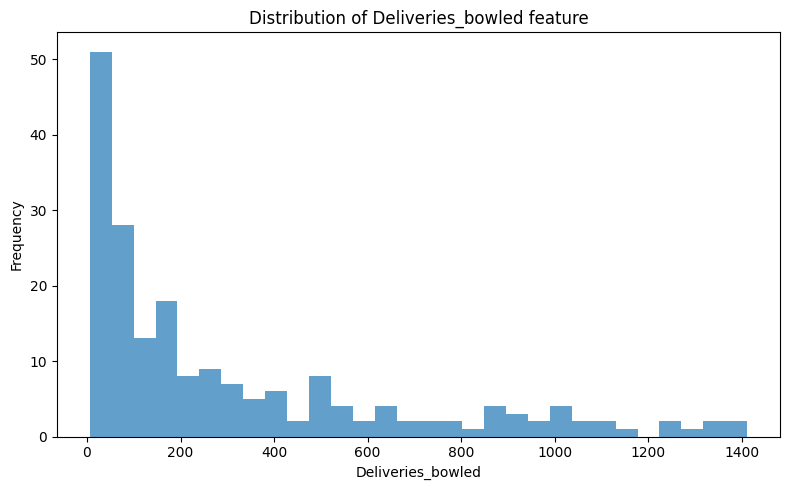

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(new_df['Deliveries_bowled'], bins=30, alpha=0.7)
plt.xlabel(new_df.columns[1])
plt.ylabel("Frequency")
plt.title("Distribution of Deliveries_bowled feature")
plt.tight_layout()
plt.show()


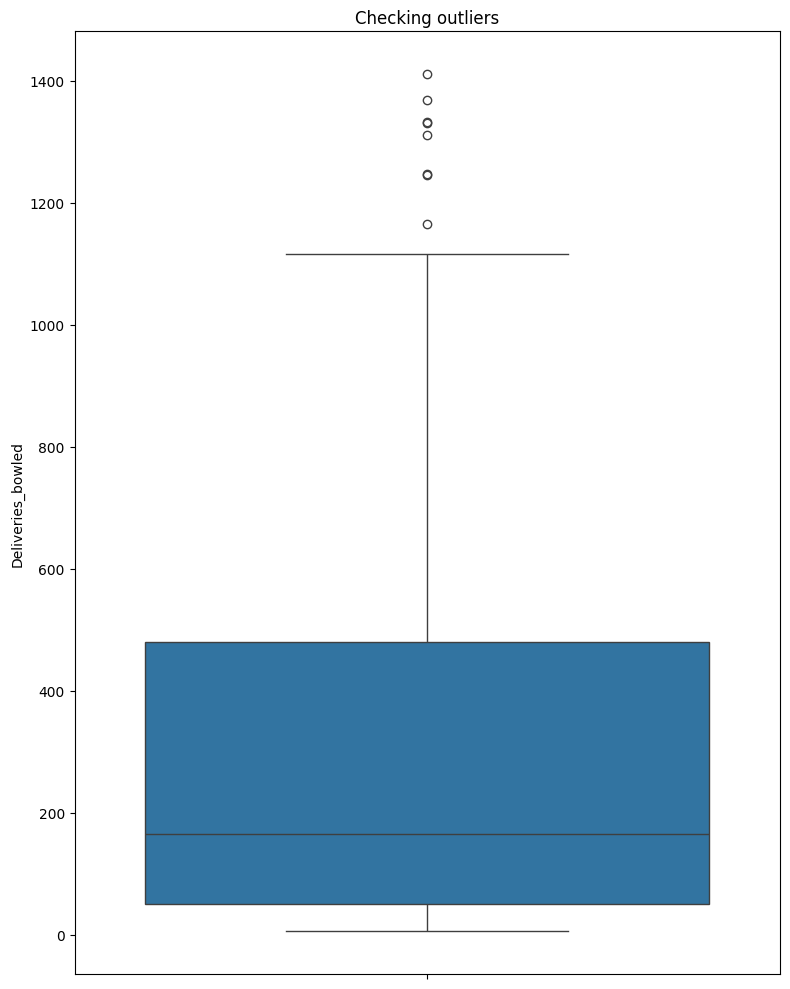

In [19]:
plt.figure(figsize=(8,10))
sns.boxplot(y=new_df['Deliveries_bowled'])
plt.title("Checking outliers")
plt.grid(False)
plt.tight_layout()
plt.show()

In [30]:
scaler = RobustScaler()
scaled_db = scaler.fit_transform(new_df[['Deliveries_bowled']])
scaled_db = pd.DataFrame(scaled_db, columns=['Deliveries_Bowled'])
scaled_db

,Deliveries_Bowled
0,2.518605
1,1.851163
2,0.044186
3,-0.369767
4,0.411628
...,...
192,-0.313953
193,1.934884
194,-0.013953
195,0.760465


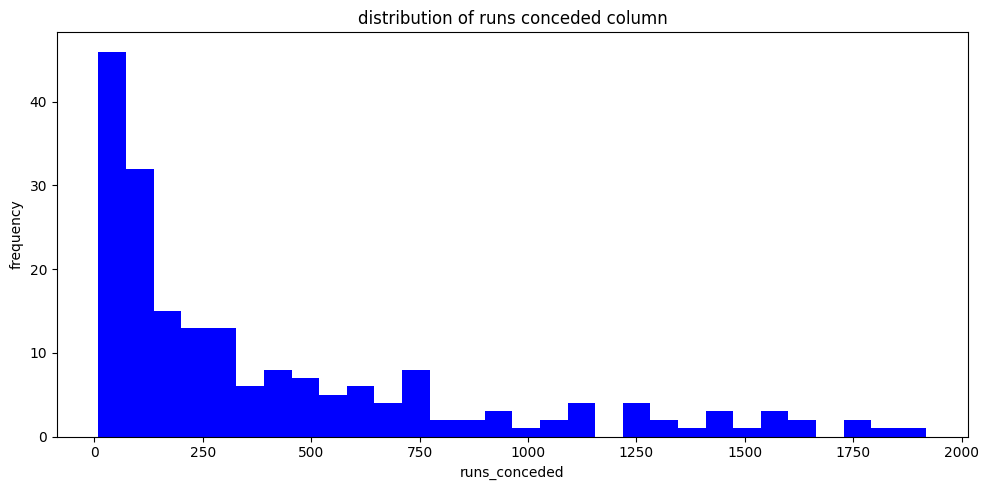

In [44]:
plt.figure(figsize=(10,5))
plt.hist(x=new_df["runs_conceded"], bins=30, color='blue')
plt.xlabel("runs_conceded")
plt.ylabel("frequency")
plt.title("distribution of runs conceded column")
plt.tight_layout()
plt.show()

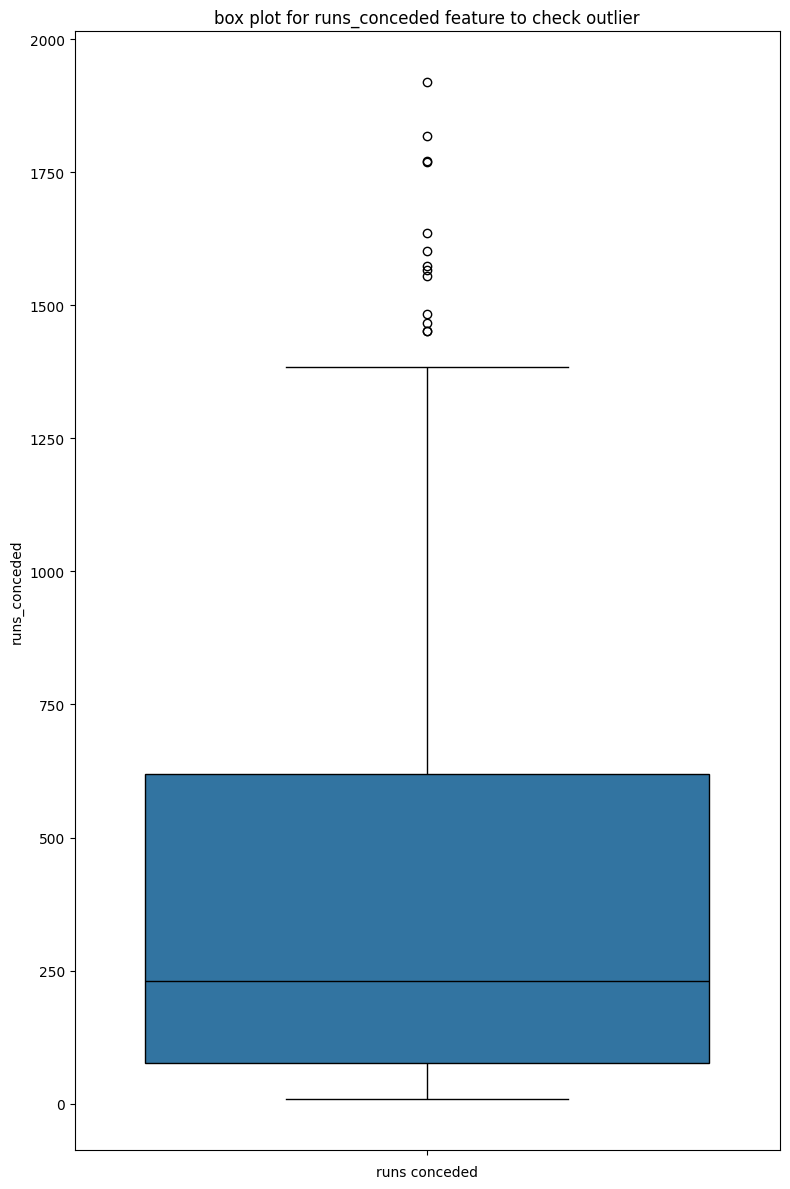

In [47]:
plt.figure(figsize=(8,12))
sns.boxplot(y=new_df['runs_conceded'], linecolor='black')
plt.title("box plot for runs_conceded feature to check outlier")
plt.xlabel("runs conceded")
plt.tight_layout()
plt.show()

In [48]:
scaled_rc = scaler.fit_transform(new_df[["runs_conceded"]])
scaled_rc = pd.DataFrame(scaled_rc, columns=["runs_conceded"])
scaled_rc

,runs_conceded
0,2.455882
1,1.632353
2,0.097426
3,-0.406250
4,0.376838
...,...
192,-0.329044
193,2.119485
194,0.069853
195,0.716912


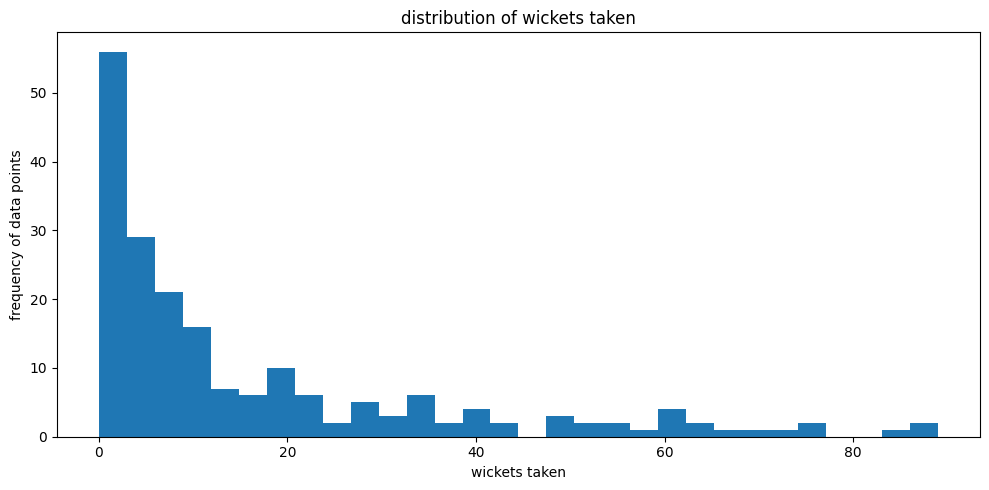

In [50]:
plt.figure(figsize=(10,5))
plt.hist(x=new_df['wickets_taken'],bins=30)
plt.title("distribution of wickets taken")
plt.xlabel("wickets taken")
plt.ylabel("frequency of data points")
plt.tight_layout()
plt.show()

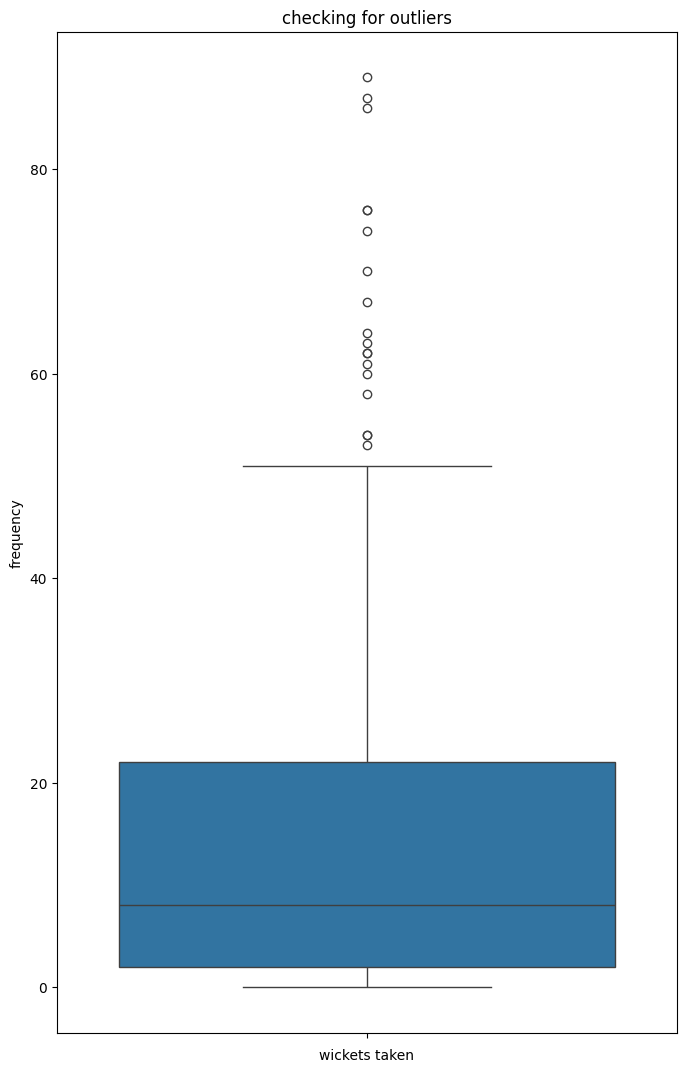

In [51]:
plt.figure(figsize=(8,13))
sns.boxplot(y=new_df["wickets_taken"])
plt.xlabel("wickets taken")
plt.ylabel("frequency")
plt.title("checking for outliers")
plt.show()

In [52]:
scaled_wt = scaler.fit_transform(new_df[["wickets_taken"]])
scaled_wt = pd.DataFrame(scaled_wt, columns = ["wickets_taken"])
scaled_wt

,wickets_taken
0,2.75
1,1.40
2,-0.05
3,-0.40
4,0.00
...,...
192,-0.40
193,2.60
194,0.25
195,0.50


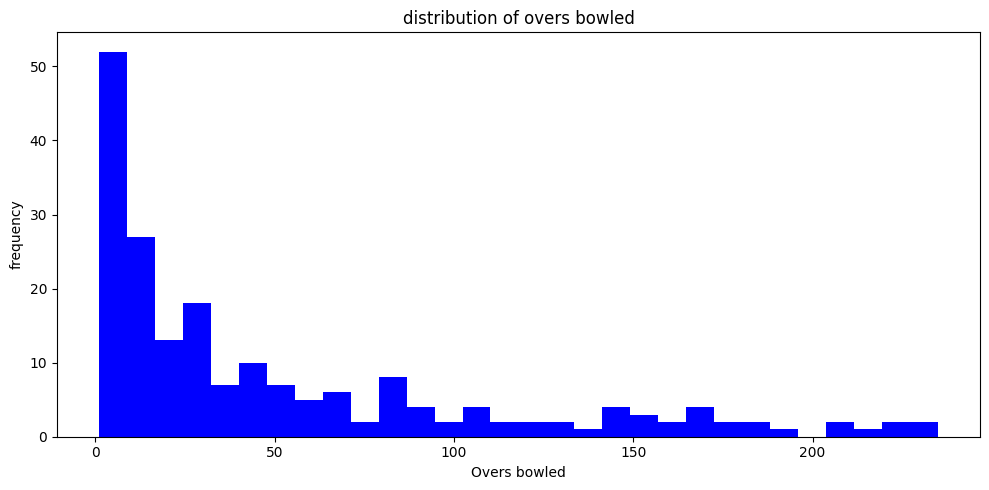

In [53]:
plt.figure(figsize=(10,5))
plt.hist(x=new_df["overs"], bins=30, color='blue')
plt.xlabel("Overs bowled")
plt.ylabel("frequency")
plt.title("distribution of overs bowled")
plt.tight_layout()
plt.show()

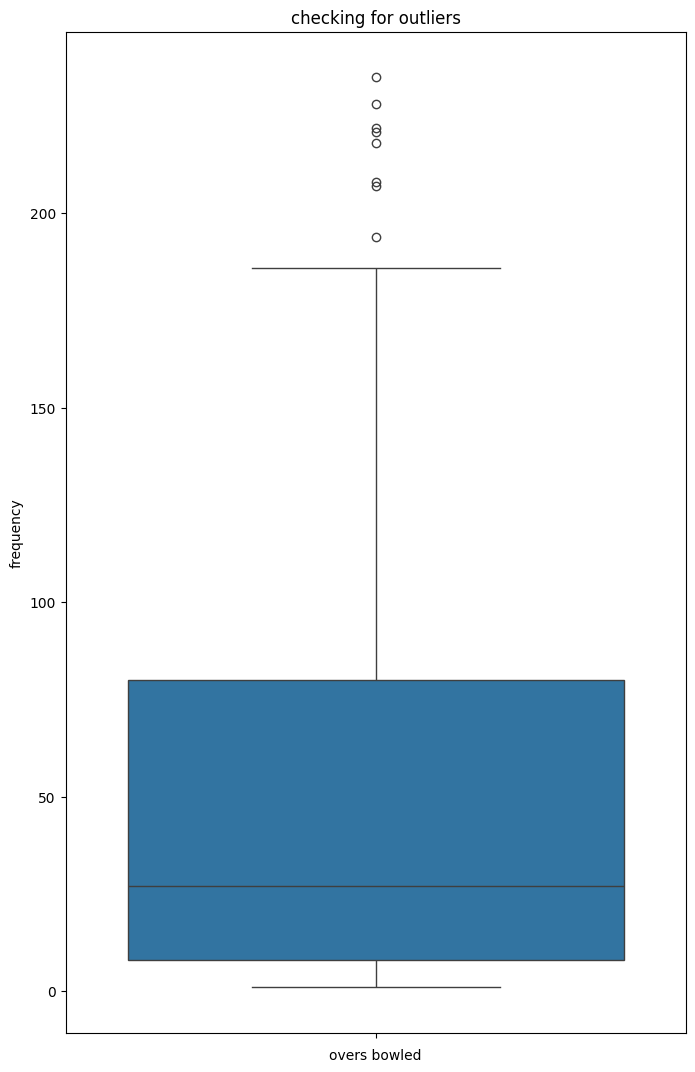

In [54]:
plt.figure(figsize=(8,13))
sns.boxplot(y=new_df["overs"])
plt.xlabel("overs bowled")
plt.ylabel("frequency")
plt.title("checking for outliers")
plt.show()

In [55]:
scaled_ob = scaler.fit_transform(new_df[["overs"]])
scaled_ob = pd.DataFrame(scaled_ob, columns = ["overs"])
scaled_ob

,overs
0,2.513889
1,1.847222
2,0.041667
3,-0.361111
4,0.416667
...,...
192,-0.305556
193,1.930556
194,-0.013889
195,0.763889


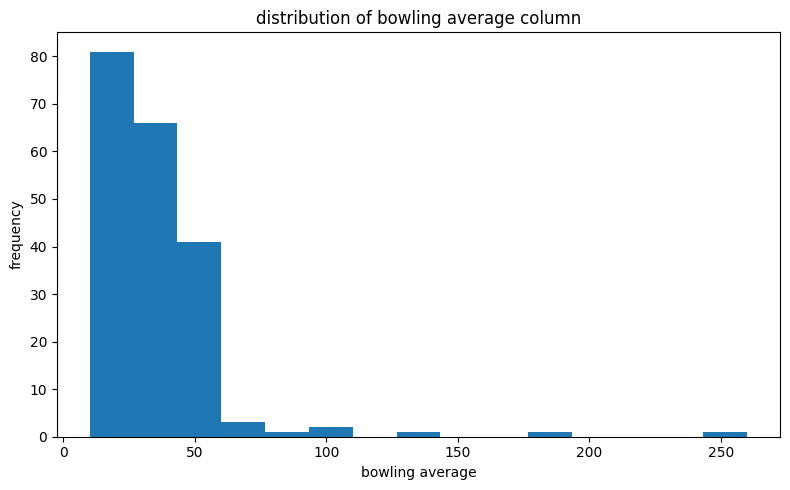

In [59]:
plt.figure(figsize=(8,5))
plt.hist(x=new_df["bowling_average"], bins=15)
plt.title("distribution of bowling average column")
plt.xlabel("bowling average")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

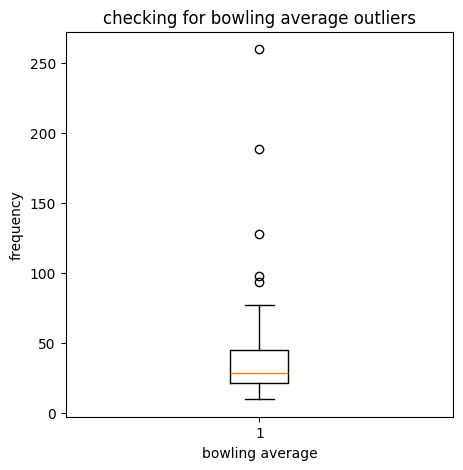

In [67]:
plt.figure(figsize=(5,5))
plt.boxplot(x=new_df["bowling_average"])
plt.xlabel("bowling average")
plt.ylabel("frequency")
plt.title("checking for bowling average outliers")
plt.show()

In [72]:
scaled_BA = scaler.fit_transform(new_df[["bowling_average"]])
scaled_BA = pd.DataFrame(scaled_BA , columns=["bowling_average"])
scaled_BA.max()

bowling_average    9.996107
dtype: float64

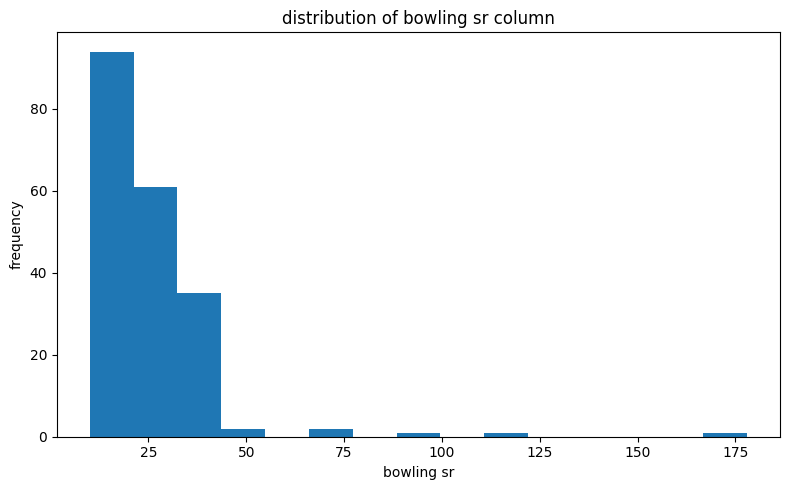

In [73]:
plt.figure(figsize=(8,5))
plt.hist(x=new_df["bowling_strike_rate"], bins=15)
plt.title("distribution of bowling sr column")
plt.xlabel("bowling sr")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

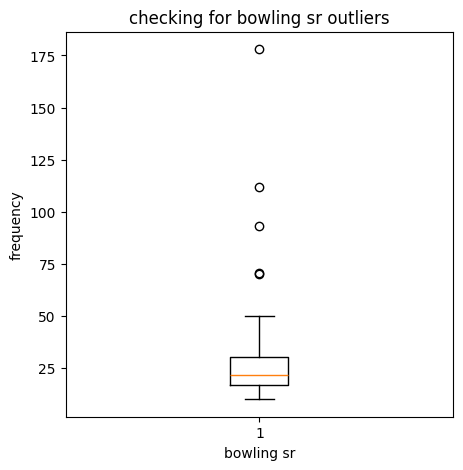

In [74]:
plt.figure(figsize=(5,5))
plt.boxplot(x=new_df["bowling_strike_rate"])
plt.xlabel("bowling sr")
plt.ylabel("frequency")
plt.title("checking for bowling sr outliers")
plt.show()

In [77]:
scaled_BSR = scaler.fit_transform(new_df[["bowling_strike_rate"]])
scaled_BSR = pd.DataFrame(scaled_BSR , columns=["bowling_strike_rate"])
scaled_BSR.min()

bowling_strike_rate   -0.867604
dtype: float64

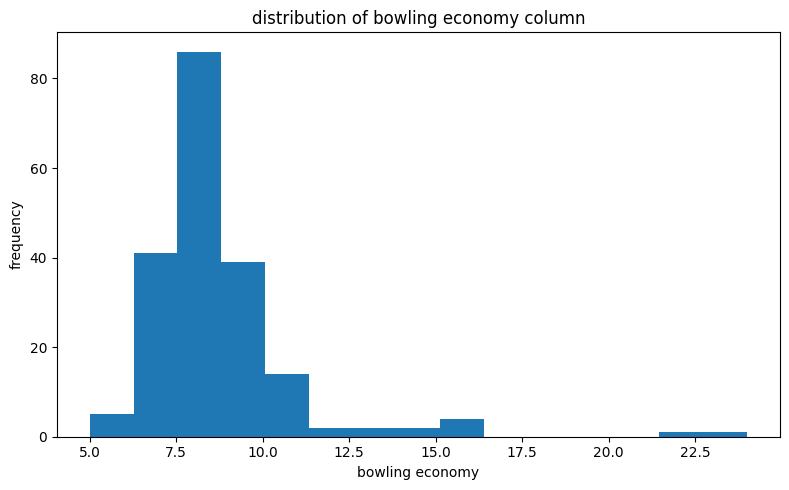

In [78]:
plt.figure(figsize=(8,5))
plt.hist(x=new_df["economy"], bins=15)
plt.title("distribution of bowling economy column")
plt.xlabel("bowling economy")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

In [82]:
scaled_BE = scaler.fit_transform(new_df[["economy"]])
scaled_BE = pd.DataFrame(scaled_BE , columns=["economy"])
scaled_BE.max()

economy    11.106383
dtype: float64

In [83]:
scaled_BE

,economy
0,-0.574468
1,-0.957447
2,0.773050
3,0.468085
4,-0.503546
...,...
192,1.319149
193,-0.007092
194,1.397163
195,-0.553191


In [85]:
transformed_df = pd.concat([scaled_db, 
                            scaled_rc, 
                            scaled_wt, 
                            scaled_ob, 
                            scaled_BA, 
                            scaled_BSR, 
                            scaled_BE, 
                            enc_recommendations_df ],
                           axis=1
                          )
transformed_df

,Deliveries_Bowled,runs_conceded,wickets_taken,overs,bowling_average,bowling_strike_rate,economy,BUY,DON'T BUY,MAYBE,NaN
0,2.518605,2.455882,2.75,2.513889,-0.174308,-0.142012,-0.574468,1.0,0.0,0.0,0.0
1,1.851163,1.632353,1.40,1.847222,0.093858,0.366864,-0.957447,0.0,0.0,1.0,0.0
2,0.044186,0.097426,-0.05,0.041667,0.499135,0.337278,0.773050,0.0,0.0,1.0,0.0
3,-0.369767,-0.406250,-0.40,-0.361111,0.845588,1.286243,0.468085,0.0,1.0,0.0,0.0
4,0.411628,0.376838,0.00,0.416667,1.102509,1.554734,-0.503546,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
192,-0.313953,-0.329044,-0.40,-0.305556,0.845588,1.286243,1.319149,0.0,0.0,0.0,1.0
193,1.934884,2.119485,2.60,1.930556,-0.252595,-0.377959,-0.007092,0.0,0.0,0.0,1.0
194,-0.013953,0.069853,0.25,-0.013889,-0.357699,-0.702663,1.397163,0.0,0.0,0.0,1.0
195,0.760465,0.716912,0.50,0.763889,0.240052,0.414201,-0.553191,0.0,0.0,0.0,1.0


In [90]:
labeled_data = transformed_df.iloc[0:20]
labeled_data_1 = labeled_data.iloc[:, :-1]
labeled_data_1

,Deliveries_Bowled,runs_conceded,wickets_taken,overs,bowling_average,bowling_strike_rate,economy,BUY,DON'T BUY,MAYBE
0,2.518605,2.455882,2.75,2.513889,-0.174308,-0.142012,-0.574468,1.0,0.0,0.0
1,1.851163,1.632353,1.40,1.847222,0.093858,0.366864,-0.957447,0.0,0.0,1.0
2,0.044186,0.097426,-0.05,0.041667,0.499135,0.337278,0.773050,0.0,0.0,1.0
3,-0.369767,-0.406250,-0.40,-0.361111,0.845588,1.286243,0.468085,0.0,1.0,0.0
4,0.411628,0.376838,0.00,0.416667,1.102509,1.554734,-0.503546,0.0,1.0,0.0
5,-0.369767,-0.404412,-0.40,-0.361111,0.845588,1.286243,1.177305,0.0,1.0,0.0
6,0.432558,0.312500,0.55,0.430556,-0.339100,-0.241124,-1.021277,1.0,0.0,0.0
7,-0.327907,-0.373162,-0.35,-0.319444,-0.081747,0.167899,-1.127660,0.0,0.0,1.0
8,0.023256,0.000000,-0.15,0.027778,0.740052,0.981509,-0.290780,0.0,1.0,0.0
9,2.897674,3.104779,4.05,2.888889,-0.317042,-0.434911,-0.120567,1.0,0.0,0.0
